<a href="https://colab.research.google.com/github/Rajesheeda/Music-Genre-Identification/blob/main/DL_Music__genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 2 : Music Genre Identification
Download data from here :  https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz?dl=0

Goal : Given audio files for songs , identify which genre they fall in

Suggested Guidelines :

1. You'll have to prepare and maintain your own version of train and validation from the full data given

2. Major challenge here is to create features from audio files which can then be passed to your choice of deep learning algorithm

3. 3. Your solution needs to be uploaded on GitHub repo at Github Website and then share the repository link to lalit.sachan@edvancer.in

In [ ]:
# !wget -q --show-progres https://www.dropbox.com/s/4jw31k5mlzcmgis/genres.tar.gz

genres.tar.gz       100%[===================>]   1.14G   108MB/s    in 12s     


In [ ]:
# !tar -xvzf genres.tar.gz

genres/
genres/blues/
genres/blues/blues.00000.au
genres/blues/blues.00001.au
genres/blues/blues.00002.au
genres/blues/blues.00003.au
genres/blues/blues.00004.au
genres/blues/blues.00005.au
genres/blues/blues.00006.au
genres/blues/blues.00007.au
genres/blues/blues.00008.au
genres/blues/blues.00009.au
genres/blues/blues.00010.au
genres/blues/blues.00011.au
genres/blues/blues.00012.au
genres/blues/blues.00013.au
genres/blues/blues.00014.au
genres/blues/blues.00015.au
genres/blues/blues.00016.au
genres/blues/blues.00017.au
genres/blues/blues.00018.au
genres/blues/blues.00019.au
genres/blues/blues.00020.au
genres/blues/blues.00021.au
genres/blues/blues.00022.au
genres/blues/blues.00023.au
genres/blues/blues.00024.au
genres/blues/blues.00025.au
genres/blues/blues.00026.au
genres/blues/blues.00027.au
genres/blues/blues.00028.au
genres/blues/blues.00029.au
genres/blues/blues.00030.au
genres/blues/blues.00031.au
genres/blues/blues.00032.au
genres/blues/blues.00033.au
genres/blues/blues.00034.a

In [ ]:
# !rm /content/genres.tar.gz

In [8]:
!pip install pydub

In [9]:
import os
from pydub import AudioSegment
from pydub.playback import play
from IPython.display import display


In [ ]:


# Assuming 'audio_file.mp3' is the path to your audio file
audio = AudioSegment.from_file("/content/genres/blues/blues.00003.au", "au")
display(audio) # This will not play, but it is required to display anything with pydub
play(audio) # Play the audio

# Listening to each audio genre

In [ ]:
for path in os.listdir("/content/genres/"):
  print(path)
  for file in os.listdir("/content/genres/"+path):
    print(file)
    # Assuming 'audio_file.mp3' is the path to your audio file
    audio = AudioSegment.from_file("/content/genres/"+path+"/"+file, "au")
    display(audio) # This will not play, but it is required to display anything with pydub
    play(audio) # Play the audio

    break


blues
blues.00075.au


hiphop
hiphop.00094.au


rock
rock.00001.au


reggae
reggae.00012.au


disco
disco.00054.au


classical
classical.00019.au


jazz
jazz.00034.au


country
country.00041.au


pop
pop.00083.au


metal
metal.00011.au


In [ ]:
!pip install split-folders

# Splitting train and test folders

In [ ]:
import splitfolders
# Define the input and output folders
input_folder = "/content/genres"  # Path to your 'genres' folder
output_folder = "/content/data"  # Path to create for train/test folders

# Split the data into train and test sets (80% train, 20% test)
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.2))

ValueError: The provided input folder "/content/genres" does not exists.

**For a single audio**

In [3]:
!pip install librosa

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import librosa
import numpy
import matplotlib.pyplot as plt
import numpy as np

# Generating Spectogram

In [ ]:
audio_file = "/content/data/train/blues/blues.00000.au"
y, sr = librosa.load(audio_file)


In [ ]:
y,sr

(array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
        -0.06106567, -0.06417847], dtype=float32),
 22050)

In [ ]:
spectogram = librosa.feature.melspectrogram(y=y, sr=sr)
spectogram_db = librosa.power_to_db(spectogram, ref=np.max)

In [ ]:
spectogram_db.shape

(128, 1293)

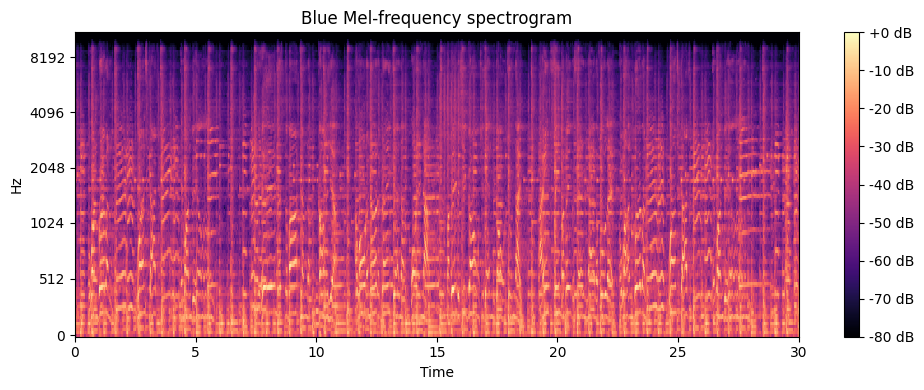

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(spectogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Blue Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

**For every audio**

In [ ]:
classes = [a for a in os.listdir('/content/genres') if '.' not in a]
print(classes)


['blues', 'hiphop', 'rock', 'reggae', 'disco', 'classical', 'jazz', 'country', 'pop', 'metal']


In [15]:

def generate_spectogram(cls):
  train_audios = os.listdir('/content/drive/MyDrive/Deeplearning/data/train/'+cls+'/')
  test_audios = os.listdir('/content/drive/MyDrive/Deeplearning/data/test/'+cls+'/')
  os.makedirs('/content/drive/MyDrive/Deeplearning/spectrogram/train/'+cls)
  os.makedirs('/content/drive/MyDrive/Deeplearning/spectrogram/test/'+cls)
  # print(cls)
  train_names = train_audios
  test_names = test_audios
  cnt = 0
  for nm in train_names:
    cnt+=1
    x , sr = librosa.load('/content/drive/MyDrive/Deeplearning/data/train/'+cls+'/'+nm)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb)
    plt.savefig('/content/drive/MyDrive/Deeplearning/spectrogram/train/'+cls+'/'+str(cnt)+'.png')
    plt.close()

  cnt = 0
  for nm in test_names:
    cnt+=1
    x , sr = librosa.load('/content/drive/MyDrive/Deeplearning/data/test/'+cls+'/'+nm)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb)
    plt.savefig('/content/drive/MyDrive/Deeplearning/spectrogram/test/'+cls+'/'+str(cnt)+'.png')
    plt.close()


In [13]:
for audio_genre in ["rock"]:#'','']:
  generate_spectogram(audio_genre)

In [ ]:
# !rm -rf /content/spectrogram/train/hiphop

In [ ]:
# !cp -r /content/data /content/drive/MyDrive/Deeplearning

In [ ]:
# !cp -r /content/spectrogram/test/blues /content/drive/MyDrive/Deeplearning/spectrogram/test/blues

In [ ]:
# !cp -r /content/spectrogram/train/blues /content/drive/MyDrive/Deeplearning/spectrogram/train/blues

# generating Wavelet data

In [8]:
def func2(cls):
  train_audios = os.listdir('/content/drive/MyDrive/Deeplearning/data/train/'+cls+'/')
  test_audios = os.listdir('/content/drive/MyDrive/Deeplearning/data/test/'+cls+'/')
  os.makedirs('/content/drive/MyDrive/Deeplearning/wavelet/train/'+cls)
  os.makedirs('/content/drive/MyDrive/Deeplearning/wavelet/test/'+cls)
  # print(cls)
  train_names = train_audios
  test_names = test_audios
  cnt = 0
  for nm in train_names:
    cnt+=1
    x , sr = librosa.load('/content/drive/MyDrive/Deeplearning/data/train/'+cls+'/'+nm)
    #plt.figure(figsize=(14, 5))
    # librosa.display.waveplot(x) # Replaced with waveshow
    librosa.display.waveshow(x, sr=sr) # Use waveshow instead of waveplot
    plt.savefig('/content/drive/MyDrive/Deeplearning/wavelet/train/'+cls+'/'+str(cnt)+'.png')
    plt.close()

  cnt = 0
  for nm in test_names:
    cnt+=1
    x , sr = librosa.load('/content/drive/MyDrive/Deeplearning/data/test/'+cls+'/'+nm)
     #plt.figure(figsize=(14, 5))
    # librosa.display.waveplot(x) # Replaced with waveshow
    librosa.display.waveshow(x, sr=sr) # Use waveshow instead of waveplot
    plt.savefig('/content/drive/MyDrive/Deeplearning/wavelet/test/'+cls+'/'+str(cnt)+'.png')
    plt.close()

In [12]:
for audio_genre in  ['blues', 'classical', 'country',  'hiphop', 'jazz', 'metal', 'pop','disco', 'reggae', 'rock']:
  func2(audio_genre)

In [14]:
import os
labels = ['blues', 'classical', 'country',  'hiphop', 'jazz', 'metal', 'pop','disco', 'reggae', 'rock']
for label in labels:
  path1 = os.path.join('/content/drive/MyDrive/Deeplearning/spectrogram/train', label)
  path2 = os.path.join('/content/drive/MyDrive/Deeplearning/wavelet/train', label)
  count1 = len([f for f in os.listdir(path1) if os.path.isfile(os.path.join(path1, f))])
  count2 = len([f for f in os.listdir(path2) if os.path.isfile(os.path.join(path2, f))])
  print(label,"= ",count1, "==",count2)


blues =  80 == 80
classical =  80 == 80
country =  80 == 80
hiphop =  80 == 80
jazz =  80 == 80
metal =  80 == 80
pop =  80 == 80
disco =  80 == 80
reggae =  80 == 80
rock =  80 == 80


# Preparing data

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os

import numpy as np
labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
img_size = 256

In [13]:
def get_data(data_dir):
    X = []  # Image data
    y = []  # Labels
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                X.append(resized_arr)  # Append image data
                y.append(class_num)  # Append corresponding label
            except Exception as e:
                print(os.path.join(path, img))
                print(e)
    X = np.stack(X)  # Stack image data as NumPy array
    y = np.array(y)  # Convert labels to NumPy array
    return X, y  # Return data as a tuple

In [15]:
train_X, train_y = get_data('/content/drive/MyDrive/Deeplearning/spectrogram/train')


In [16]:
val_X, val_y = get_data('/content/drive/MyDrive/Deeplearning/spectrogram/test')

In [17]:
train_X.shape ,train_y.shape , val_X.shape , val_y.shape

((732, 256, 256, 3), (732,), (200, 256, 256, 3), (200,))

In [ ]:
train_y[50:55]

array([1, 1, 1, 1, 1])

In [10]:
x_train = []
y_train = []
x_val = []
y_val = []

# Normalize the data
x_train = np.array(train_X) / 255
x_val = np.array(val_X) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(train_y)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(val_y)

# CNN Model

In [11]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)


In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(10, activation="softmax"))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,426,282 (32.14 MB)

 Trainable params: 8,426,282 (32.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])


In [ ]:
history = model.fit(x_train,y_train,epochs = 400, validation_data = (x_val, y_val))

Epoch 1/400


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 389ms/step - accuracy: 0.1030 - loss: 2.3029 - val_accuracy: 0.2500 - val_loss: 2.2318
Epoch 2/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.2491 - loss: 2.1543 - val_accuracy: 0.2800 - val_loss: 2.0404
Epoch 3/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.2765 - loss: 2.0163 - val_accuracy: 0.2950 - val_loss: 1.9459
Epoch 4/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3363 - loss: 1.8178 - val_accuracy: 0.3100 - val_loss: 1.8386
Epoch 5/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.3596 - loss: 1.7674 - val_accuracy: 0.3400 - val_loss: 1.8638
Epoch 6/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.3882 - loss: 1.7022 - val_accuracy: 0.3300 - val_loss: 1.7091
Epoch 7/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.4159 - loss: 1.6398 - val_accuracy: 0.3700 - val_loss: 1.6604
Epoch 8/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.4563 - loss: 1.5238 - val_accuracy: 0.4300 - val

In [ ]:

import pickle
model.save_weights('500_epoch_simple_lr.weights.h5')

pickle.dump(history.history, open('history_500_epoch_simple.pkl','wb'))

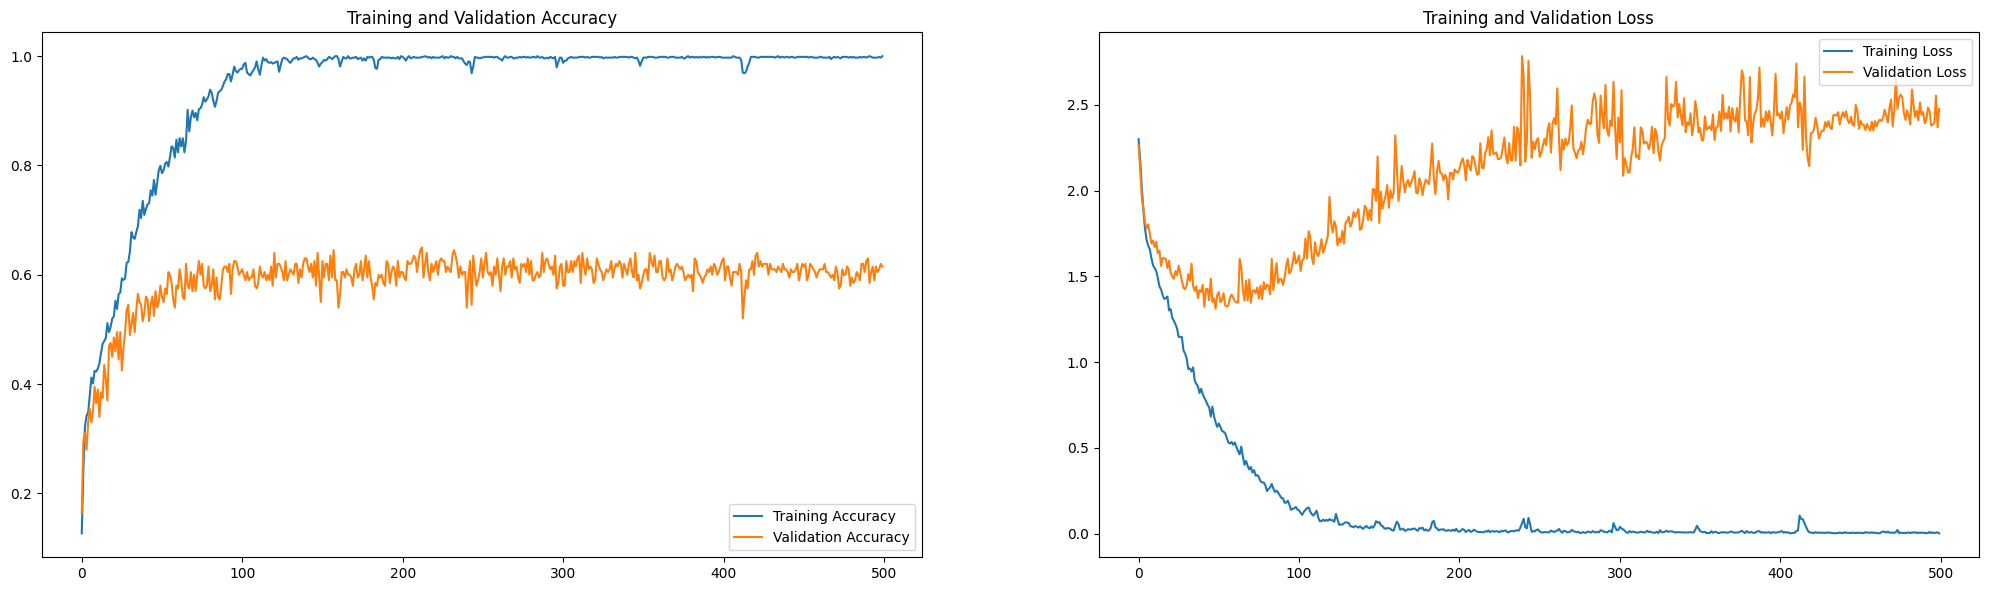

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

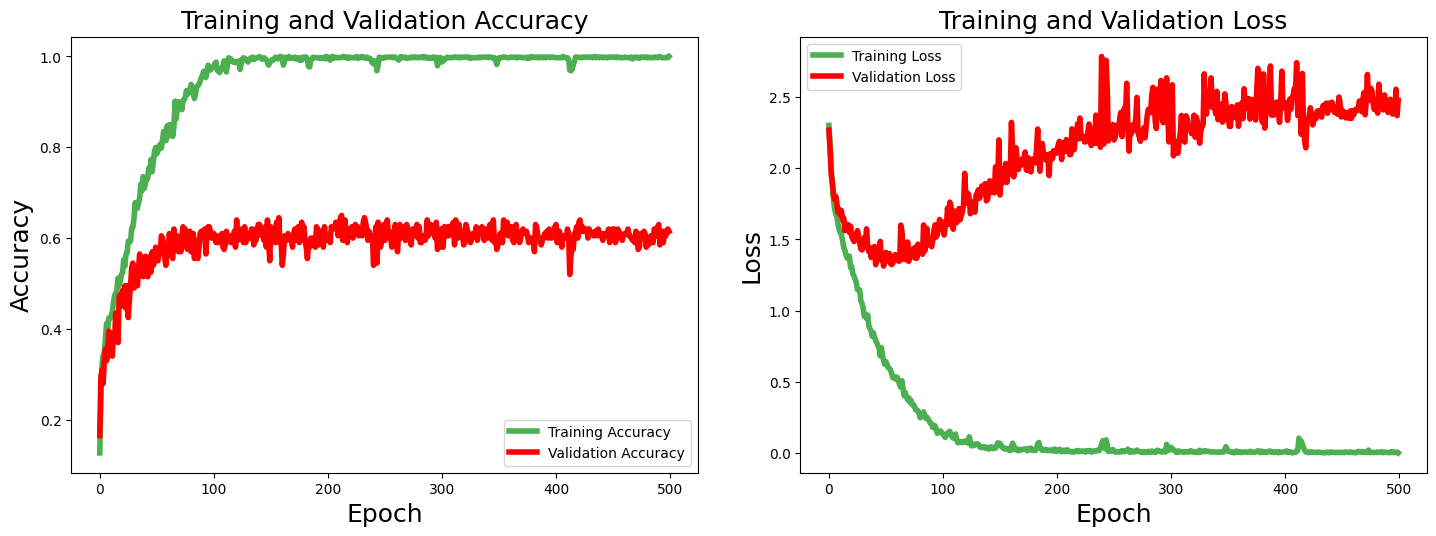

<Figure size 640x480 with 0 Axes>

In [ ]:
import pickle
history = pickle.load(open('history_500_epoch_simple.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(500)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
plt.show()
plt.savefig('sim_plot1.png',bbox_inches = 'tight')
plt.clf()
# plt.show()

In [ ]:
predictions = np.argmax(model.predict(x_val), axis=-1) # Use np.argmax to get predicted classes
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = labels))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
              precision    recall  f1-score   support

       blues       0.54      0.70      0.61        20
   classical       0.77      0.85      0.81        20
     country       0.52      0.60      0.56        20
       disco       0.57      0.40      0.47        20
      hiphop       0.83      0.50      0.62        20
        jazz       0.67      0.60      0.63        20
       metal       0.86      0.90      0.88        20
         pop       0.65      0.65      0.65        20
      reggae       0.45      0.75      0.57        20
        rock       0.36      0.20      0.26        20

    accuracy                           0.61       200
   macro avg       0.62      0.61      0.61       200
weighted avg       0.62      0.61      0.61       200



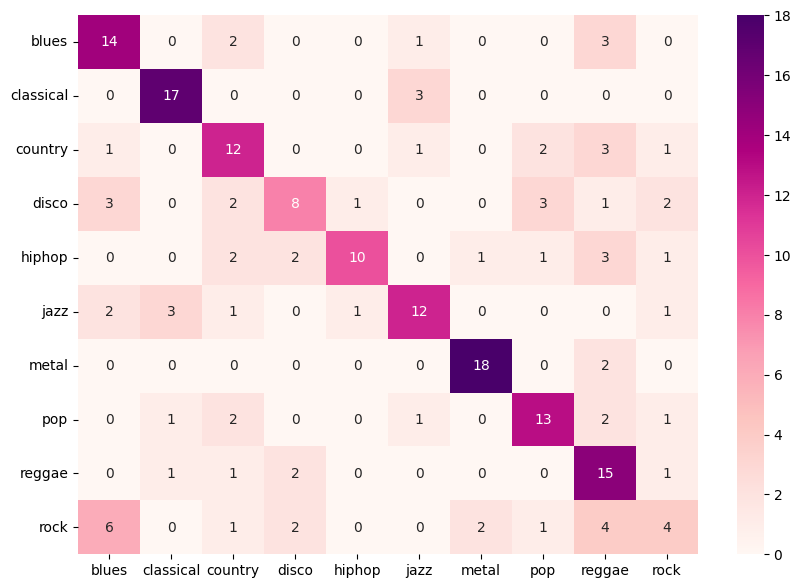

In [ ]:

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx1.png',bbox_inches = 'tight')

# Transfer Learning based modeling

In [12]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = "imagenet")


<ipython-input-12-eb2cd48ef17a>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = "imagenet")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
base_model.trainable = False
model = tf.keras.Sequential([base_model,
                                 tf.keras.layers.GlobalAveragePooling2D(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(10, activation="softmax")
                                ])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 8, 8, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [15]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history1 = model.fit(x_train,y_train,epochs = 400 , validation_data = (x_val, y_val))

Epoch 1/400


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 ━━━━━━━━━━━━━━━━━━━━ 30s 823ms/step - accuracy: 0.1196 - loss: 2.4117 - val_accuracy: 0.1950 - val_loss: 2.2724
Epoch 2/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - accuracy: 0.1546 - loss: 2.2800 - val_accuracy: 0.2250 - val_loss: 2.1858
Epoch 3/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.1678 - loss: 2.2368 - val_accuracy: 0.2600 - val_loss: 2.1138
Epoch 4/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.2312 - loss: 2.1671 - val_accuracy: 0.2900 - val_loss: 2.0562
Epoch 5/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.2781 - loss: 2.0793 - val_accuracy: 0.3250 - val_loss: 2.0036
Epoch 6/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2695 - loss: 2.0520 - val_accuracy: 0.3550 - val_loss: 1.9596
Epoch 7/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3186 - loss: 1.9890 - val_accuracy: 0.3600 - val_loss: 1.9138
Epoch 8/400
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.2987 - loss: 1.9792 - val_accuracy: 0.3800 - va

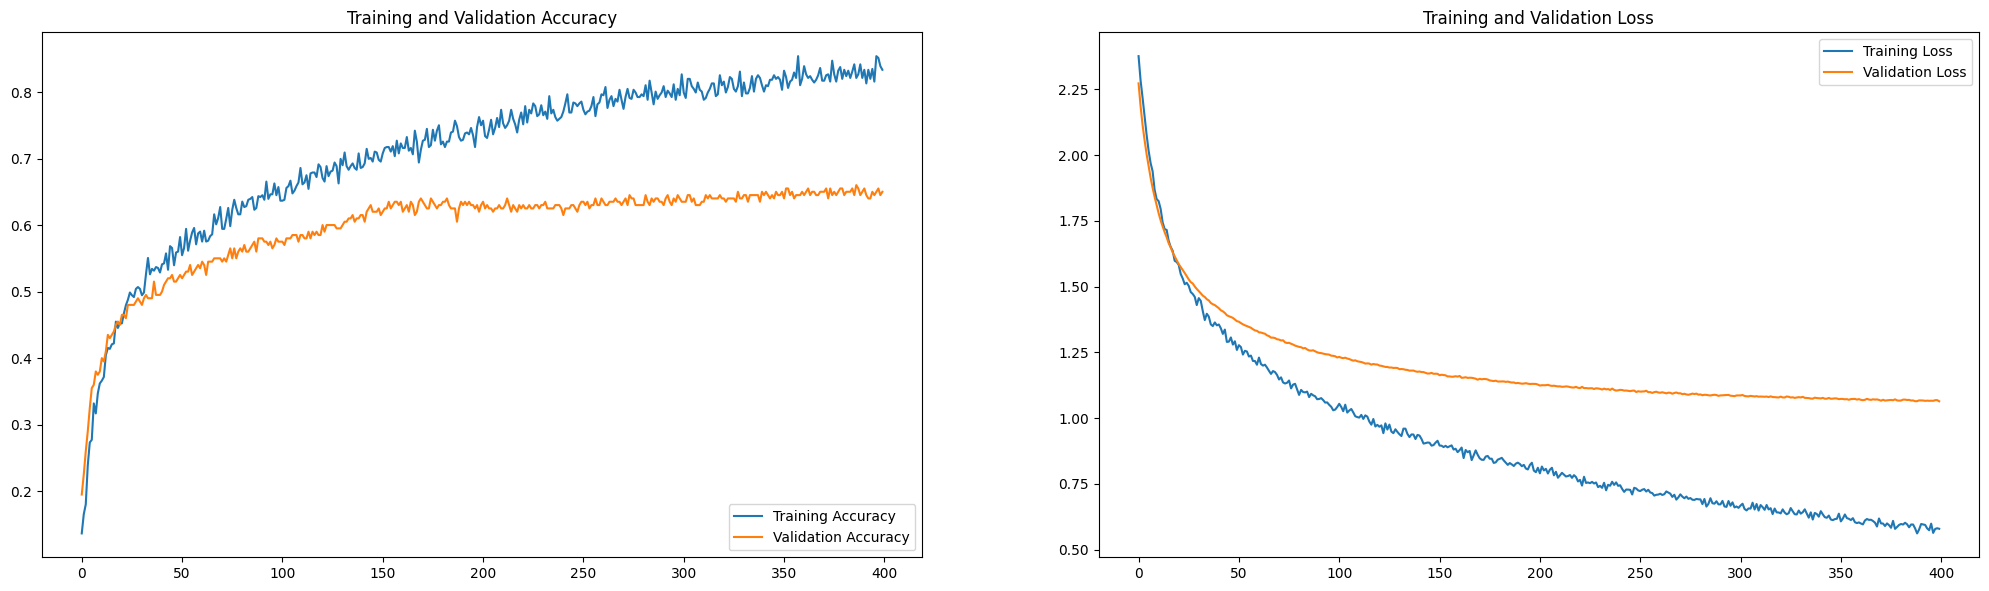

In [17]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(400)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [19]:

import pickle

model.save_weights('500_epoch_simple_tr.weights.h5')

pickle.dump(history1.history, open('history_500_epoch_simple_tr.pkl','wb'))

In [22]:
import pickle
history = pickle.load(open('history_500_epoch_simple_tr.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(400)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('tfr_plot1.png',bbox_inches = 'tight')
plt.clf()


<Figure size 1500x600 with 0 Axes>

In [24]:
predictions = np.argmax(model.predict(x_val), axis=-1) # Use np.argmax to get predicted classes
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = labels))

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 456ms/step
              precision    recall  f1-score   support

       blues       0.58      0.35      0.44        20
   classical       0.84      0.80      0.82        20
     country       0.58      0.70      0.64        20
       disco       0.71      0.60      0.65        20
      hiphop       0.64      0.70      0.67        20
        jazz       0.61      0.85      0.71        20
       metal       0.72      0.90      0.80        20
         pop       0.65      0.55      0.59        20
      reggae       0.62      0.75      0.68        20
        rock       0.50      0.30      0.38        20

    accuracy                           0.65       200
   macro avg       0.65      0.65      0.64       200
weighted avg       0.65      0.65      0.64       200



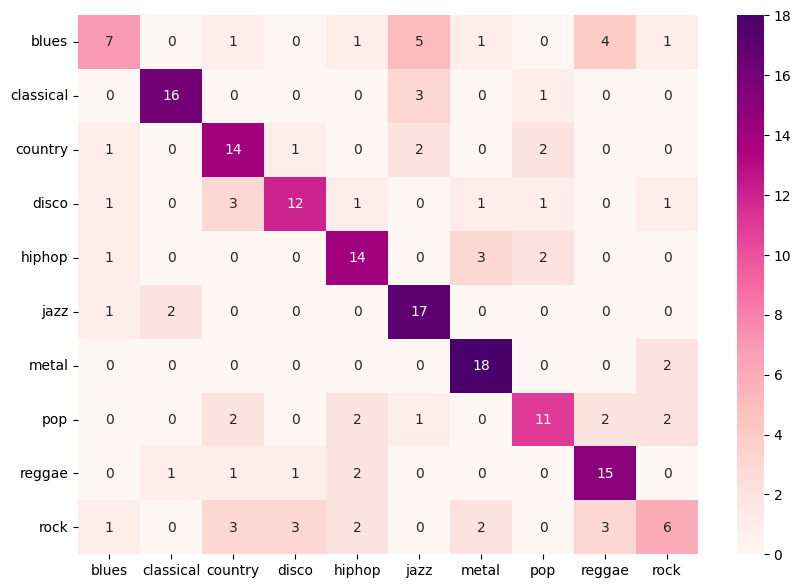

In [25]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx2.png',bbox_inches = 'tight')

# Multi-Model Training

In [16]:
labels = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
img_size = 256
import os
import cv2
import numpy as np

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                # Ensure data consistency for NumPy array creation
                data.append([resized_arr, np.array([class_num])])  # Wrap class_num in an array
            except Exception as e:
                print(e)

    # Separate images and labels for stacking
    images = [item[0] for item in data]
    labels_np = [item[1] for item in data]

    # Stack images and labels into NumPy arrays
    images_np = np.stack(images)
    labels_np = np.concatenate(labels_np)  # Concatenate labels into a single array

    return images_np, labels_np  # Return data as a tuple

In [ ]:
x_sp_train, y_sp_train = get_data('/content/drive/MyDrive/Deeplearning/spectrogram/train')
x_sp_val, y_sp_val = get_data('/content/drive/MyDrive/Deeplearning/spectrogram/test')


In [18]:

x_wv_train, y_wv_train = get_data('/content/drive/MyDrive/Deeplearning/wavelet/train')
x_wv_val,  y_wv_val = get_data('/content/drive/MyDrive/Deeplearning/wavelet/test')

In [19]:
# Normalize the data
x_sp_train = np.array(x_sp_train) / 255
x_sp_val = np.array(x_sp_val) / 255

x_sp_train.reshape(-1, img_size, img_size, 1)
y_sp_train = np.array(y_sp_train)

x_sp_val.reshape(-1, img_size, img_size, 1)
y_sp_val = np.array(y_sp_val)

In [20]:

# Normalize the data
x_wv_train = np.array(x_wv_train) / 255
x_wv_val = np.array(x_wv_val) / 255

x_wv_train.reshape(-1, img_size, img_size, 1)
y_wv_train = np.array(y_wv_train)

x_wv_val.reshape(-1, img_size, img_size, 1)
y_wv_val = np.array(y_wv_val)


In [21]:
datagen_sp = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen_sp.fit(x_sp_train)

datagen_wv = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        #horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen_wv.fit(x_wv_train)

In [22]:

input_sp = keras.Input(shape=(256,256,3))
input_wv = keras.Input(shape=(256,256,3))

x = Conv2D(32,3,padding="same", activation="relu")(input_sp)
x = MaxPool2D()(x)
x = Conv2D(64, 3, padding="same", activation="relu")(x)
x = MaxPool2D()(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
x = Dense(128,activation="relu")(x)
x = keras.Model(inputs=input_sp, outputs=x)

y = Conv2D(32,3,padding="same", activation="relu")(input_wv)
y = MaxPool2D()(y)
y = Conv2D(64, 3, padding="same", activation="relu")(y)
y = MaxPool2D()(y)
y = Dropout(0.4)(y)
y = Flatten()(y)
y = Dense(128,activation="relu")(y)
y = keras.Model(inputs=input_wv, outputs=y)

from tensorflow.keras.layers import concatenate
combined = concatenate([x.output, y.output])

z = Dense(32, activation="relu")(combined)
z = Dense(10, activation="softmax")(z)

model = keras.Model(inputs=[x.input, y.input], outputs=z)

In [23]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 32)   │            896 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 32)   │            896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 32)   │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 128, 128, 32)   │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 64)   │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 64)   │         18,496 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 64)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 64, 64, 64)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 64, 64, 64)     │              0 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 64, 64, 64)     │              0 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 262144)         │              0 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 262144)         │              0 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │     33,554,560 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │     33,554,560 │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 256)            │              0 │ dense[0][0],           │
│                      

 Total params: 67,156,458 (256.18 MB)

 Trainable params: 67,156,458 (256.18 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])


In [25]:
print("x_sp_train shape:", x_sp_train.shape)
print("x_wv_train shape:", x_wv_train.shape)
print("y_sp_train shape:", y_sp_train.shape)
print("y_wv_train shape:", y_wv_train.shape)
print("x_sp_val shape:", x_sp_val.shape)
print("x_wv_val shape:", x_wv_val.shape)
print("y_sp_val shape:", y_sp_val.shape)
print("y_wv_val shape:", y_sp_val.shape)

x_sp_train shape: (800, 256, 256, 3)
x_wv_train shape: (800, 256, 256, 3)
y_sp_train shape: (800,)
y_wv_train shape: (800,)
x_sp_val shape: (200, 256, 256, 3)
x_wv_val shape: (200, 256, 256, 3)
y_sp_val shape: (200,)
y_wv_val shape: (200,)


In [26]:
history2 = model.fit(
    [x_sp_train,x_wv_train]
    ,y_sp_train,
    epochs = 300,
    validation_data = ([x_sp_val,x_wv_val], y_sp_val))


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


25/25 ━━━━━━━━━━━━━━━━━━━━ 249s 10s/step - accuracy: 0.0982 - loss: 2.3976 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 246s 9s/step - accuracy: 0.0942 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 272s 9s/step - accuracy: 0.0924 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 289s 11s/step - accuracy: 0.0941 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 259s 10s/step - accuracy: 0.0978 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 256s 10s/step - accuracy: 0.0836 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/300
25/25 ━━━━━━━━━━━━━━━━━━━━ 259s 10s/step - accuracy: 0.1173 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/300
20/25 ━━━━━━━━━━━━━━━━━━━━ 42s 8s/step - accuracy: 0.0853 - loss: 2.3026

KeyboardInterrupt: 

In [37]:
import pickle
model.save_weights('multi_lr.weights.h5')
pickle.dump(history2.history, open('history_500_epoch_multi.pkl','wb'))

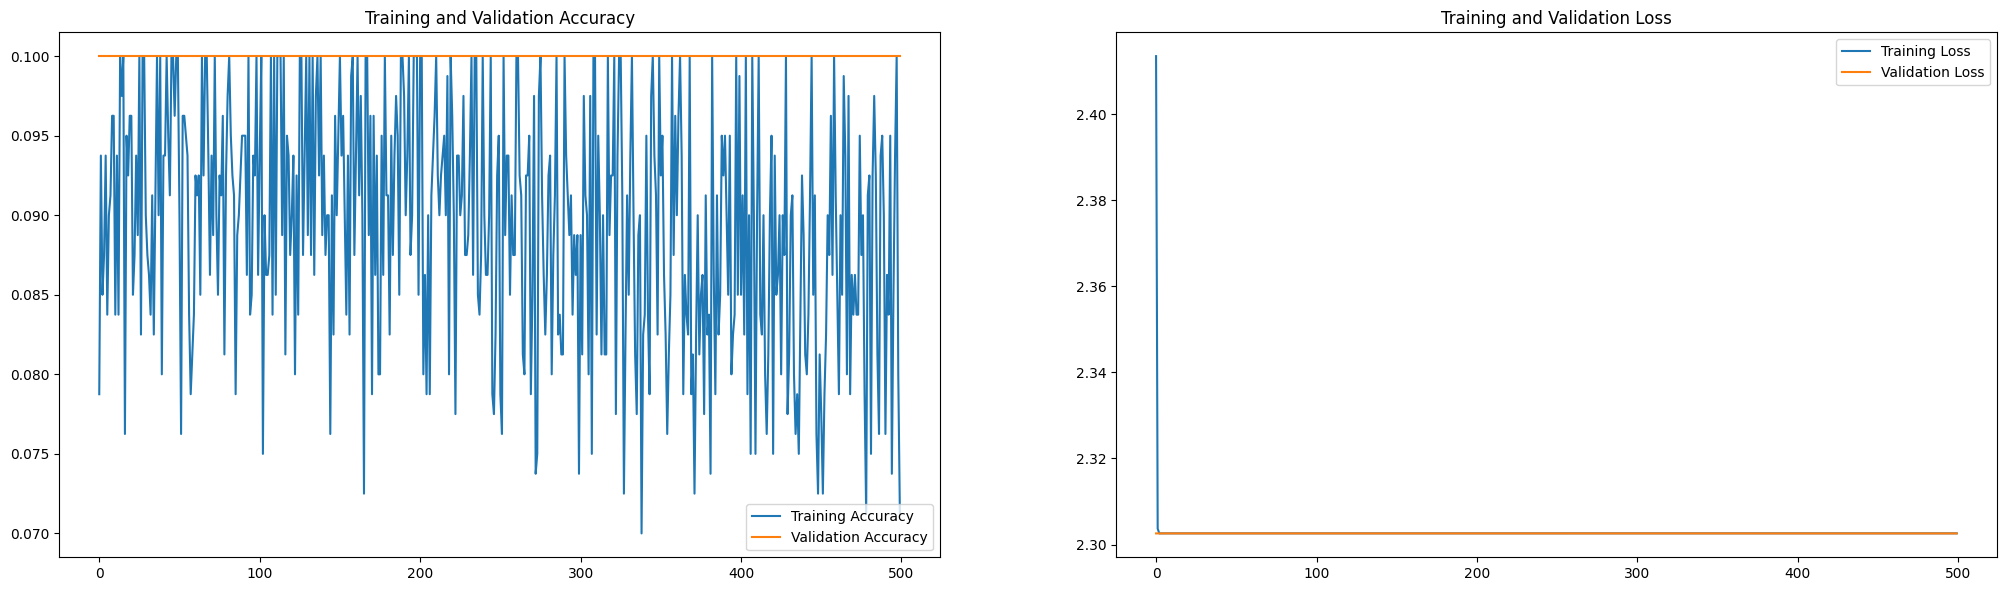

In [38]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(25, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [39]:
import pickle
history = pickle.load(open('history_500_epoch_multi.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(500)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('multi_plot1.png',bbox_inches = 'tight')
plt.clf()

<Figure size 1500x600 with 0 Axes>

In [40]:
predictions = model.predict([x_sp_val,x_wv_val])
print(classification_report(y_sp_val, np.argmax(predictions, axis=1), target_names = labels))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
              precision    recall  f1-score   support

       blues       0.00      0.00      0.00        20
   classical       0.00      0.00      0.00        20
     country       0.00      0.00      0.00        20
       disco       0.00      0.00      0.00        20
      hiphop       0.00      0.00      0.00        20
        jazz       0.00      0.00      0.00        20
       metal       0.00      0.00      0.00        20
         pop       0.00      0.00      0.00        20
      reggae       0.10      1.00      0.18        20
        rock       0.00      0.00      0.00        20

    accuracy                           0.10       200
   macro avg       0.01      0.10      0.02       200
weighted avg       0.01      0.10      0.02       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
predictions = np.argmax(model.predict(x_val), axis=-1)
cm1 = confusion_matrix(y_wv_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in labels],
              columns = [i for i in labels])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")
plt.savefig('confusion_mrtx3.png',bbox_inches = 'tight')


NameError: name 'model' is not defined

In [ ]:
epochs_range = range(500)
import matplotlib.pyplot as plt
import pickle
history = pickle.load(open('history_500_epoch_simple.pkl','rb'))
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

history = pickle.load(open('history_500_epoch_tr.pkl','rb'))
acc1 = history['accuracy']
val_acc1 = history['val_accuracy']
loss1 = history['loss']
val_loss1 = history['val_loss']

history = pickle.load(open('history_500_epoch_multi.pkl','rb'))
acc2 = history['accuracy']
val_acc2 = history['val_accuracy']
loss2 = history['loss']
val_loss2 = history['val_loss']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='CNN Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='CNN Validation Accuracy', c='red', linewidth=4)
ax1.plot(epochs_range, acc1, label='Transfer learning Training Accuracy', c = '#e72866', linewidth=4)
ax1.plot(epochs_range, val_acc1, label='Transfer learning Validation Accuracy', c='#282ec7', linewidth=4)
ax1.plot(epochs_range, acc2, label='Multi modal Training Accuracy', c = '#171c1c', linewidth=4)
ax1.plot(epochs_range, val_acc2, label='Multi modal Validation Accuracy', c='#62176e', linewidth=4)

ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='CNN Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='CNN Validation Loss', c='red', linewidth=4)
ax2.plot(epochs_range, loss1, label='Transfer learning Training Loss',c = '#c72866', linewidth=4)
ax2.plot(epochs_range, val_loss1, label='Transfer learning Validation Loss', c='#282ec7', linewidth=4)
ax2.plot(epochs_range, loss2, label='Multi modal Training Loss',c = '#171c1c', linewidth=4)
ax2.plot(epochs_range, val_loss2, label='Multi modal learning Validation Loss', c='#62176e', linewidth=4)

ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
#plt.show()
plt.savefig('all_1.png',bbox_inches = 'tight')
plt.clf()



Using PreTrained Modeles